<a href="https://colab.research.google.com/github/yogasgm/data-science-machine-learning-BI/blob/main/Introduction_to_Emotion_Analysis_Multi_Class_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Analysis with IndoBERT (Multi-Class Classification)**

##**Importing required libraries**

In [1]:
# Install Huggingface Transformers
! pip install huggingface transformers --quiet

In [2]:
import pandas as pd
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

##**Importing Dataset**

In [3]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/001_suku-bunga.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_tweet = pd.read_csv(data_url)

##**Loading the IndoBERT Model**

In [ ]:
# Download Pretrained Model for Emotion Classification
emotion_pretrained = "thoriqfy/indobert-emotion-classification"

# Set Model and Tokenizer for Emotion Classification
emotion_tokenizer = BertTokenizer.from_pretrained(emotion_pretrained)
emotion_config = BertConfig.from_pretrained(emotion_pretrained)
emotion_model = BertForSequenceClassification.from_pretrained(emotion_pretrained, config=emotion_config)

# Create emotion classifier using huggingface pipeline
emotion_analysis = pipeline("text-classification", model=emotion_model, tokenizer=emotion_tokenizer)

In [4]:
# Download Pretrained Model
pretrained = "thoriqfy/indobert-emotion-classification"

In [5]:
# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
emotion_analysis = pipeline("text-classification", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


##**Performing Sentiment Analysis**

In [7]:
def get_emotion(text):
    # Tokenize text and truncate to ensure it doesn't exceed the maximum limit
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:min(len(tokens), 512 - 2)]  # 2 tokens for [CLS] and [SEP]

    # Convert tokens back to string
    truncated_text = tokenizer.convert_tokens_to_string(tokens)

    # Get emotion
    output = emotion_analysis(truncated_text)[0]
    label = output['label']
    score = output['score']
    return label, score

In [8]:
# Test with one sentence
text = "Kebijakannya kacau balau"
emotion, score = get_emotion(text)
print(f'The emotion is: {emotion} with a score of: {score}')

The emotion is: Anger with a score of: 0.7450321316719055


##**Applying Emotion Analysis to Dataframe**

In [10]:
# Get emotion label for each row in dataframe
df_tweet[['emotion', 'score']] = df_tweet['text'].apply(lambda x: pd.Series(get_emotion(x)))

In [11]:
# Show Tweet with emotion
df_tweet[['text', 'emotion', 'score']]

,text,emotion,score
0,Disiplin Fiskal: Rasio utang lebih dari 60% da...,Neutral,0.997473
1,"BI Kerek Suku Bunga Acuan, Pengusaha Berharap ...",Neutral,0.973557
2,[BREAKING] Bank Indonesia menaikkan suku bunga...,Neutral,0.993195
3,#EURUSD : Menanti Kebijakan Suku Bunga ECB an...,Neutral,0.996338
4,Muncul di browse youtube gua video finfluencer...,Anger,0.995824
...,...,...,...
498,Terbaru! Konsensus Ekonom Ramal BI Tahan Suku ...,Neutral,0.987443
499,IHSG Diprediksi Sideways Menanti Suku Bunga BI...,Neutral,0.988282
500,"Selepas keluar dari Mesir, Bani Israil mendiri...",Neutral,0.998441
501,Pagi. Semalam bursa AS ditutup melemah di teng...,Neutral,0.992391


<Axes: xlabel='emotion', ylabel='count'>

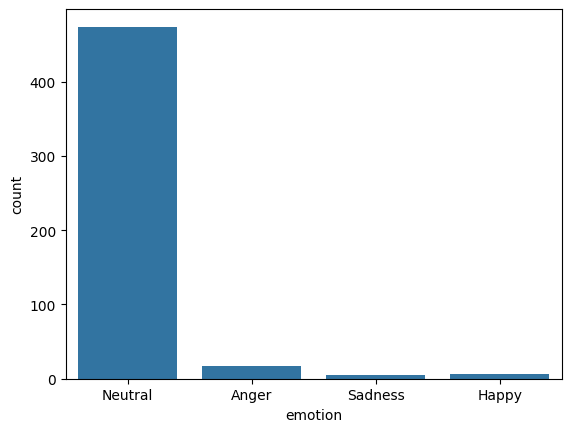

In [12]:
# Visualise the emotion distribution
sns.countplot(x ='emotion', data = df_tweet)